In [1]:
import json
import sqlite3
from sqlalchemy import create_engine, Column, Integer, String, Float, ForeignKey, DateTime
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker, relationship
import ccxt
import requests
from datetime import datetime
from sqlalchemy import MetaData
from sqlalchemy.orm import sessionmaker
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def clean_database(engine):
    metadata = MetaData(bind=engine)
    metadata.reflect()

In [65]:
Base = declarative_base()

class Token(Base):
    __tablename__ = 'tokens'
    id = Column(Integer, primary_key=True)
    symbol = Column(String)
    name = Column(String)

class HistoricalMarketCap(Base):
    __tablename__ = 'historical_market_caps'
    id = Column(Integer, primary_key=True)
    token_id = Column(Integer, ForeignKey('tokens.id'))
    source = Column(String)
    timestamp = Column(DateTime)
    market_cap = Column(Float)
    token = relationship('Token', backref='historical_market_caps')
    
    
class ExchangePrice(Base):
    __tablename__ = 'exchange_prices'
    id = Column(Integer, primary_key=True)
    symbol = Column(String)
    exchange = Column(String)
    timestamp = Column(DateTime)
    open_price = Column(Float)
    high_price = Column(Float)
    low_price = Column(Float)
    close_price = Column(Float)


class DeFiLlamaTVL(Base):
    __tablename__ = 'defillama_tvl'
    id = Column(Integer, primary_key=True)
    protocol = Column(String)
    timestamp = Column(DateTime)
    tvl = Column(Float)

    
    

    
    
# Create the database engine
engine = create_engine('sqlite:///defillama.db')

# Create a session
Session = sessionmaker(bind=engine)
session = Session()
    

In [21]:
#let's get both btc and eth data an put into seperate data frame. It should be easier to work with thata way

In [66]:
# Retrieve data from the database and store it in a pandas DataFrame
def retrieve_data_from_database():
    conn = sqlite3.connect('crypto_data.db')
    query = "SELECT * FROM exchange_prices WHERE symbol='MATICUSDT'"
    matic_data = pd.read_sql_query(query, conn)
    conn.close()

    return matic_data

# Call the function to retrieve BTCUSDT data
matic_data = retrieve_data_from_database()

# Display the retrieved data
print('Retrieved data from the database:')


Retrieved data from the database:


In [67]:
# Retrieve data from the database and store it in a pandas DataFrame
def retrieve_data_from_database():
    conn = sqlite3.connect('crypto_data.db')
    query = "SELECT * FROM exchange_prices WHERE symbol='LTCUSDT'"
    ltc_data = pd.read_sql_query(query, conn)
    conn.close()

    return ltc_data

# Call the function to retrieve BTCUSDT data
ltc_data = retrieve_data_from_database()

# Display the retrieved data
print('Retrieved data from the database:')


Retrieved data from the database:


In [68]:
# Retrieve data from the database and store it in a pandas DataFrame
def retrieve_data_from_database():
    conn = sqlite3.connect('crypto_data.db')
    query = "SELECT * FROM exchange_prices WHERE symbol='BTCUSDT'"
    btc_data = pd.read_sql_query(query, conn)
    conn.close()

    return btc_data

# Call the function to retrieve BTCUSDT data
btc_data = retrieve_data_from_database()

# Display the retrieved data
print('Retrieved data from the database:')


Retrieved data from the database:


In [69]:
# Retrieve data from the database and store it in a pandas DataFrame
def retrieve_data_from_database():
    conn = sqlite3.connect('crypto_data.db')
    query = "SELECT * FROM exchange_prices WHERE symbol='ETHUSDT'"
    eth_data = pd.read_sql_query(query, conn)
    conn.close()

    return eth_data

# Call the function to retrieve BTCUSDT data
eth_data = retrieve_data_from_database()

# Display the retrieved data
print('Retrieved data from the database:')


Retrieved data from the database:


In [70]:
def retrieve_data_from_database():
    conn = sqlite3.connect('crypto_data.db')
    query = "SELECT * FROM historical_market_caps WHERE token_id IN (SELECT id FROM tokens WHERE symbol = 'matic-network')"
    matic_cap_data = pd.read_sql_query(query, conn)
    conn.close()

    return matic_cap_data

# Call the function to retrieve BTCUSDT data
matic_cap_data = retrieve_data_from_database()

# Display the retrieved data
print('Retrieved data from the database:')

Retrieved data from the database:


In [72]:
def retrieve_data_from_database():
    conn = sqlite3.connect('crypto_data.db')
    query = "SELECT * FROM historical_market_caps WHERE token_id IN (SELECT id FROM tokens WHERE symbol = 'bitcoin')"
    btc_cap_data = pd.read_sql_query(query, conn)
    conn.close()

    return btc_cap_data

# Call the function to retrieve BTCUSDT data
btc_cap_data = retrieve_data_from_database()

# Display the retrieved data
print('Retrieved data from the database:')

Retrieved data from the database:


In [74]:
def retrieve_data_from_database():
    conn = sqlite3.connect('crypto_data.db')
    query = "SELECT * FROM historical_market_caps WHERE token_id IN (SELECT id FROM tokens WHERE symbol = 'ethereum')"
    eth_cap_data = pd.read_sql_query(query, conn)
    conn.close()

    return eth_cap_data

# Call the function to retrieve BTCUSDT data
eth_cap_data = retrieve_data_from_database()

# Display the retrieved data
print('Retrieved data from the database:')

Retrieved data from the database:


In [75]:
def retrieve_data_from_database():
    conn = sqlite3.connect('crypto_data.db')
    query = "SELECT * FROM historical_market_caps WHERE token_id IN (SELECT id FROM tokens WHERE symbol = 'litecoin')"
    ltc_cap_data = pd.read_sql_query(query, conn)
    conn.close()

    return ltc_cap_data

# Call the function to retrieve BTCUSDT data
ltc_cap_data = retrieve_data_from_database()

# Display the retrieved data
print('Retrieved data from the database:')

Retrieved data from the database:


In [ ]:
#keys to exploring the database

# btc price data = btc_data
# eth price data = eth_data
# matic price data = matic_data
# ltc price data = ltc_data
# btc market cap data = btc_cap_data
# eth market cap data = eth_cap_data
# ltc market cap data = ltc_cap_data
# matic market cap data = matic_cap_data

In [77]:
print(btc_data)

       id   symbol exchange                   timestamp    open_price  \
0       1  BTCUSDT  Binance         2023-05-28 01:00:00  26854.280000   
1       2  BTCUSDT  Binance         2023-05-29 01:00:00  28065.010000   
2       3  BTCUSDT  Binance         2023-05-30 01:00:00  27736.390000   
3       4  BTCUSDT  Binance         2023-05-31 01:00:00  27694.390000   
4       5  BTCUSDT  Binance         2023-06-01 01:00:00  27210.360000   
..    ...      ...      ...                         ...           ...   
720  2166  BTCUSDT  Bittrex  2023-06-22 00:00:00.000000  29951.154808   
721  2167  BTCUSDT  Bittrex  2023-06-23 00:00:00.000000  29923.896000   
722  2168  BTCUSDT  Bittrex  2023-06-24 00:00:00.000000  30645.499225   
723  2169  BTCUSDT  Bittrex  2023-06-25 00:00:00.000000  30581.313579   
724  2170  BTCUSDT  Bittrex  2023-06-26 00:00:00.000000  30427.116009   

       high_price     low_price   close_price  
0    28261.320000  26764.360000  28065.000000  
1    28447.140000  27524.60

In [7]:
#Lets see an overview of btc data (close_price )

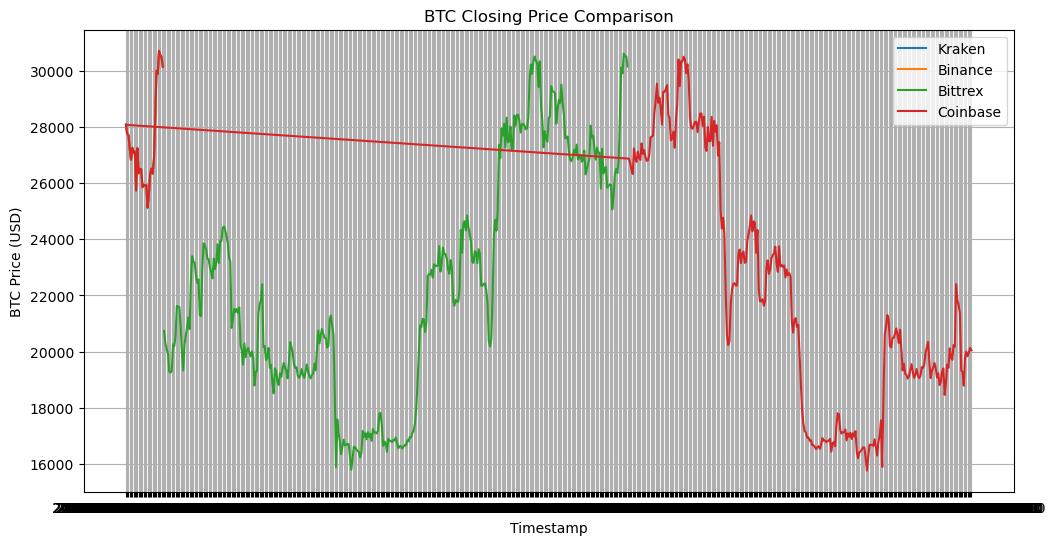

In [78]:
# Filter the data for the desired exchanges
exchanges = ['Kraken', 'Binance', 'Bittrex', 'Coinbase']
filtered_data = btc_data[btc_data['exchange'].isin(exchanges)]

# Plot the closing price for each exchange
plt.figure(figsize=(12, 6))
for exchange in exchanges:
    exchange_data = filtered_data[filtered_data['exchange'] == exchange]
    plt.plot(exchange_data['timestamp'], exchange_data['close_price'], label=exchange)

plt.xlabel('Timestamp')
plt.ylabel('BTC Price (USD)')
plt.title('BTC Closing Price Comparison')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#I do not really understand, most exchange do not show up on the plot maybe a combined plot would help 

In [ ]:
#BTCUSD data

In [ ]:
#let's create combined plot to see construct of btc data in the  database.

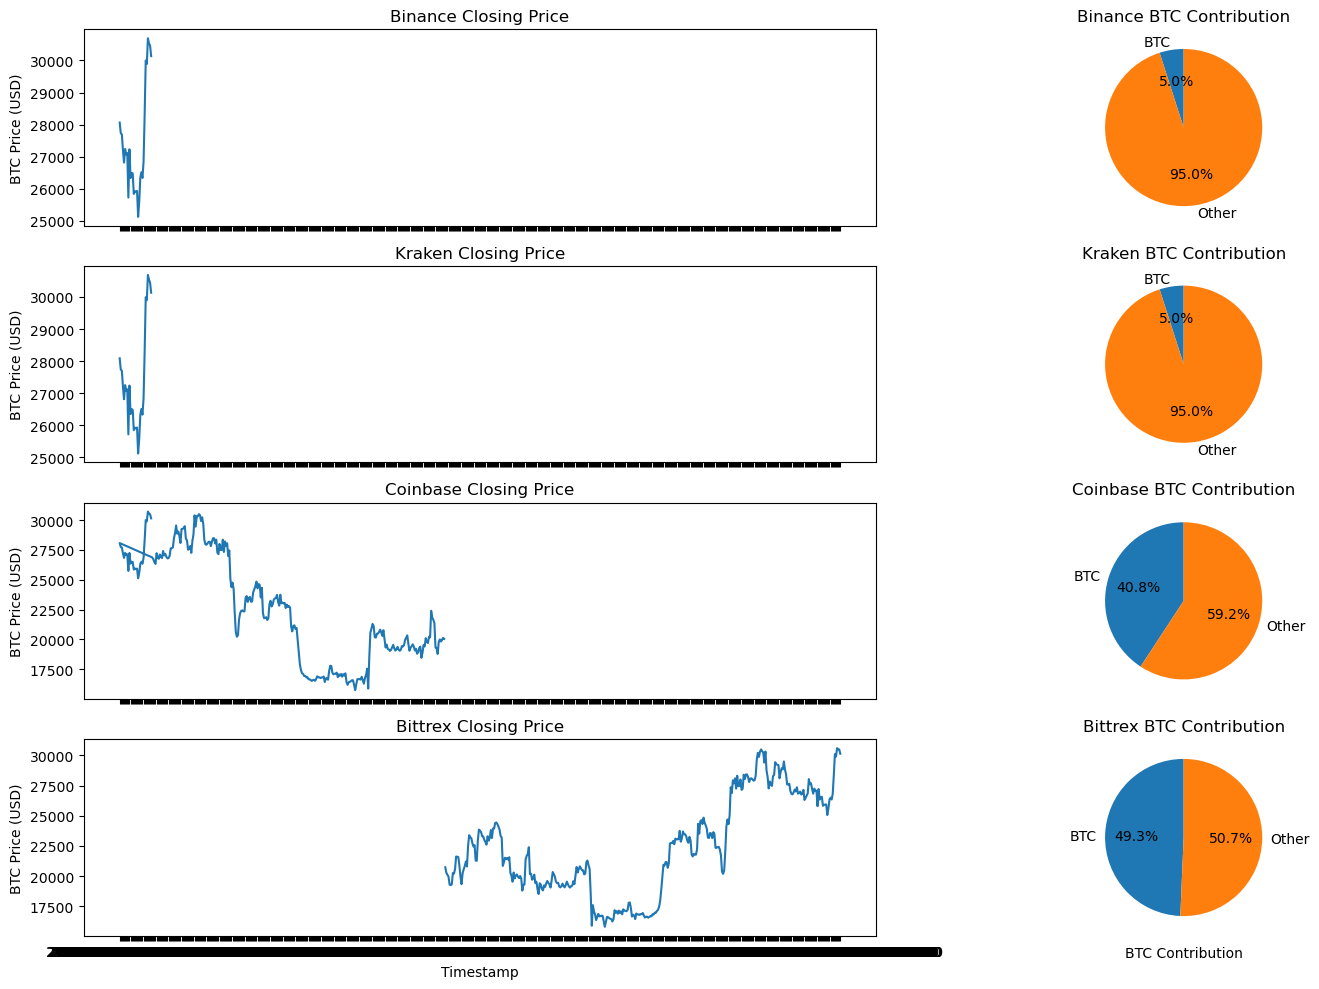

In [91]:
# Calculate the total closing price for each exchange
total_closing_price = filtered_data.groupby('exchange')['close_price'].sum()

# Create subplots for each exchange
fig, axs = plt.subplots(len(exchanges), 2, figsize=(16, 10), sharex='col')

# Iterate over each exchange
for i, exchange in enumerate(exchanges):
    exchange_data = filtered_data[filtered_data['exchange'] == exchange]
    
    # Plot the closing price
    axs[i, 0].plot(exchange_data['timestamp'], exchange_data['close_price'])
    axs[i, 0].set_ylabel('BTC Price (USD)')
    axs[i, 0].set_title(f'{exchange} Closing Price')
    
    # Check if the exchange exists in the total_closing_price data
    if exchange in total_closing_price.index:
        # Calculate the BTC percentage contribution
        btc_percentage = total_closing_price[exchange] / total_closing_price.sum()
        other_percentage = 1 - btc_percentage
    
        # Create a pie chart for the exchange
        axs[i, 1].pie([btc_percentage, other_percentage], labels=['BTC', 'Other'], autopct='%1.1f%%', startangle=90)
        axs[i, 1].set_title(f'{exchange} BTC Contribution')

# Set common x-axis label
axs[-1, 0].set_xlabel('Timestamp')
axs[-1, 1].set_xlabel('BTC Contribution')

# Adjust spacing between subplots
fig.tight_layout()

# Show the combined plot
plt.show()


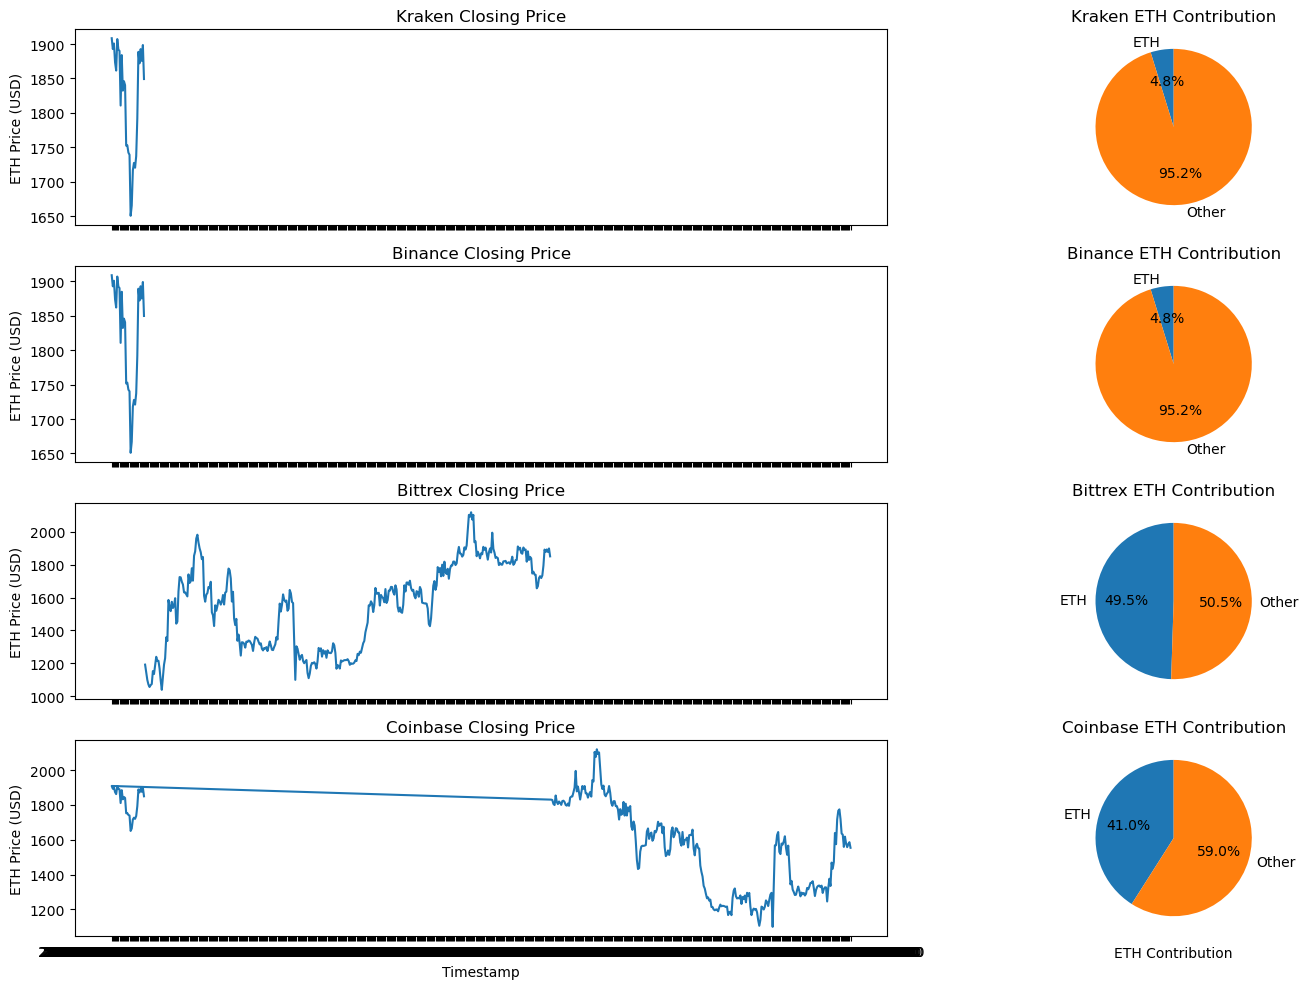

In [92]:
# Filter the data for the desired exchanges and date range
exchanges = ['Kraken', 'Binance', 'Bittrex', 'Coinbase']
start_date = ' 2022-08-27'  # Adjust the start date as needed
filtered_data = eth_data[(eth_data['exchange'].isin(exchanges)) & (eth_data['timestamp'] >= start_date)]

# Calculate the total closing price for each exchange
total_closing_price = filtered_data.groupby('exchange')['close_price'].sum()

# Create subplots for each exchange
fig, axs = plt.subplots(len(exchanges), 2, figsize=(16, 10), sharex='col')

# Iterate over each exchange
for i, exchange in enumerate(exchanges):
    exchange_data = filtered_data[filtered_data['exchange'] == exchange]
    
    # Plot the closing price
    axs[i, 0].plot(exchange_data['timestamp'], exchange_data['close_price'])
    axs[i, 0].set_ylabel('ETH Price (USD)')
    axs[i, 0].set_title(f'{exchange} Closing Price')
    
    # Check if the exchange exists in the total_closing_price data
    if exchange in total_closing_price.index:
        # Calculate the ETH percentage contribution
        eth_percentage = total_closing_price[exchange] / total_closing_price.sum()
        other_percentage = 1 - eth_percentage
    
        # Create a pie chart for the exchange
        axs[i, 1].pie([eth_percentage, other_percentage], labels=['ETH', 'Other'], autopct='%1.1f%%', startangle=90)
        axs[i, 1].set_title(f'{exchange} ETH Contribution')

# Set common x-axis label
axs[-1, 0].set_xlabel('Timestamp')
axs[-1, 1].set_xlabel('ETH Contribution')

# Adjust spacing between subplots
fig.tight_layout()

# Show the combined plot
plt.show()


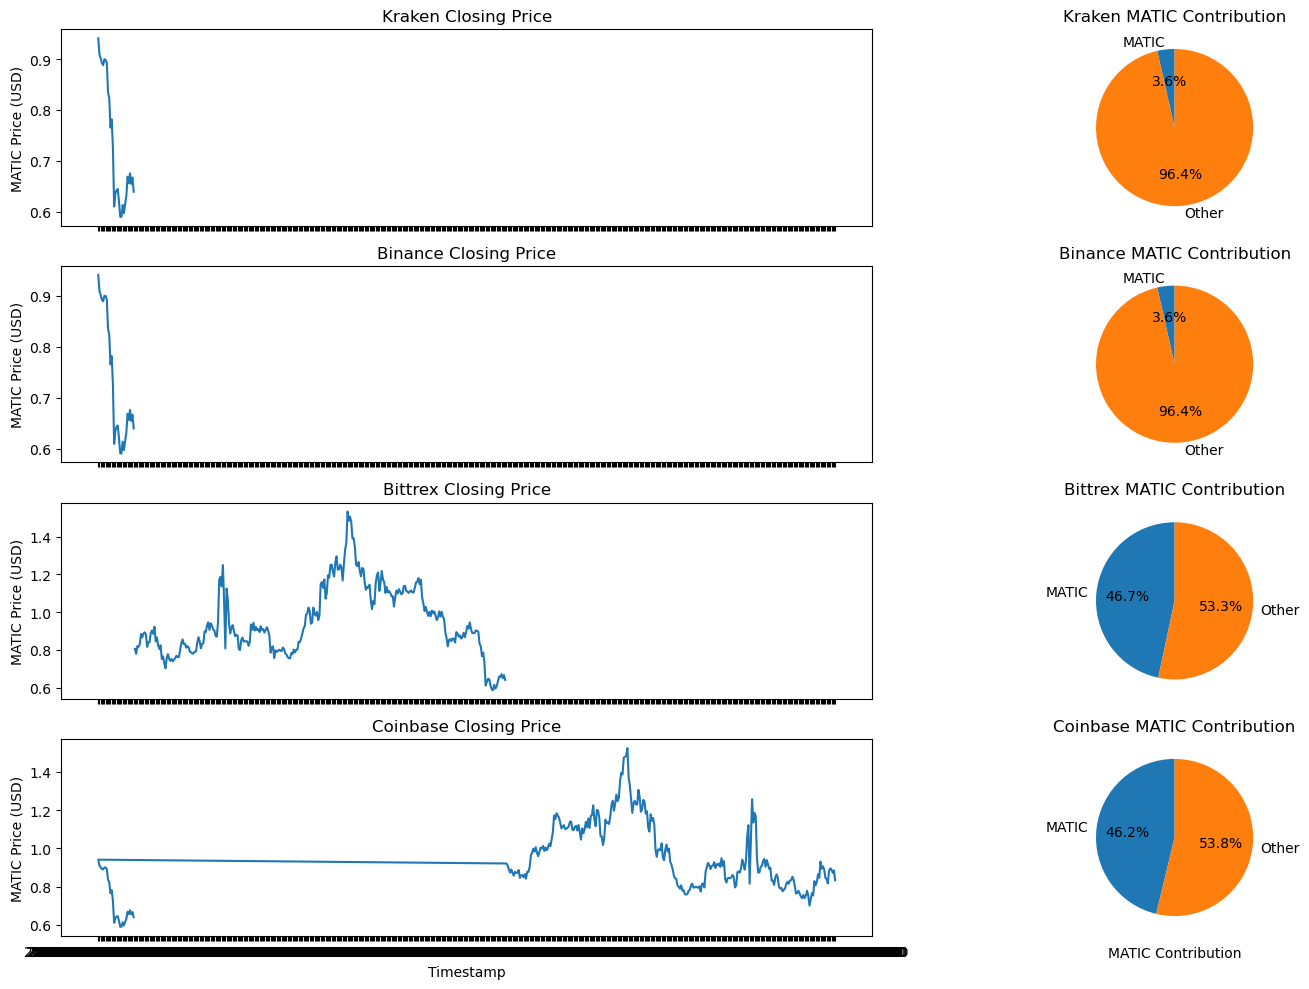

In [97]:
# Filter the data for the desired exchanges and date range
exchanges = ['Kraken', 'Binance', 'Bittrex', 'Coinbase']
start_date = '2022-08-27'  # Adjust the start date as needed
filtered_data = matic_data[(matic_data['exchange'].isin(exchanges)) & (matic_data['timestamp'] >= start_date)]

# Calculate the total closing price for each exchange
total_closing_price = filtered_data.groupby('exchange')['close_price'].sum()

# Create subplots for each exchange
fig, axs = plt.subplots(len(exchanges), 2, figsize=(16, 10), sharex='col')

# Iterate over each exchange
for i, exchange in enumerate(exchanges):
    exchange_data = filtered_data[filtered_data['exchange'] == exchange]
    
    # Plot the closing price
    axs[i, 0].plot(exchange_data['timestamp'], exchange_data['close_price'])
    axs[i, 0].set_ylabel('MATIC Price (USD)')
    axs[i, 0].set_title(f'{exchange} Closing Price')
    
    # Check if the exchange exists in the total_closing_price data
    if exchange in total_closing_price.index:
        # Calculate the MATIC percentage contribution
        matic_percentage = total_closing_price[exchange] / total_closing_price.sum()
        other_percentage = 1 - matic_percentage
    
        # Create a pie chart for the exchange
        axs[i, 1].pie([matic_percentage, other_percentage], labels=['MATIC', 'Other'], autopct='%1.1f%%', startangle=90)
        axs[i, 1].set_title(f'{exchange} MATIC Contribution')

# Set common x-axis label
axs[-1, 0].set_xlabel('Timestamp')
axs[-1, 1].set_xlabel('MATIC Contribution')

# Adjust spacing between subplots
fig.tight_layout()

# Show the combined plot
plt.show()


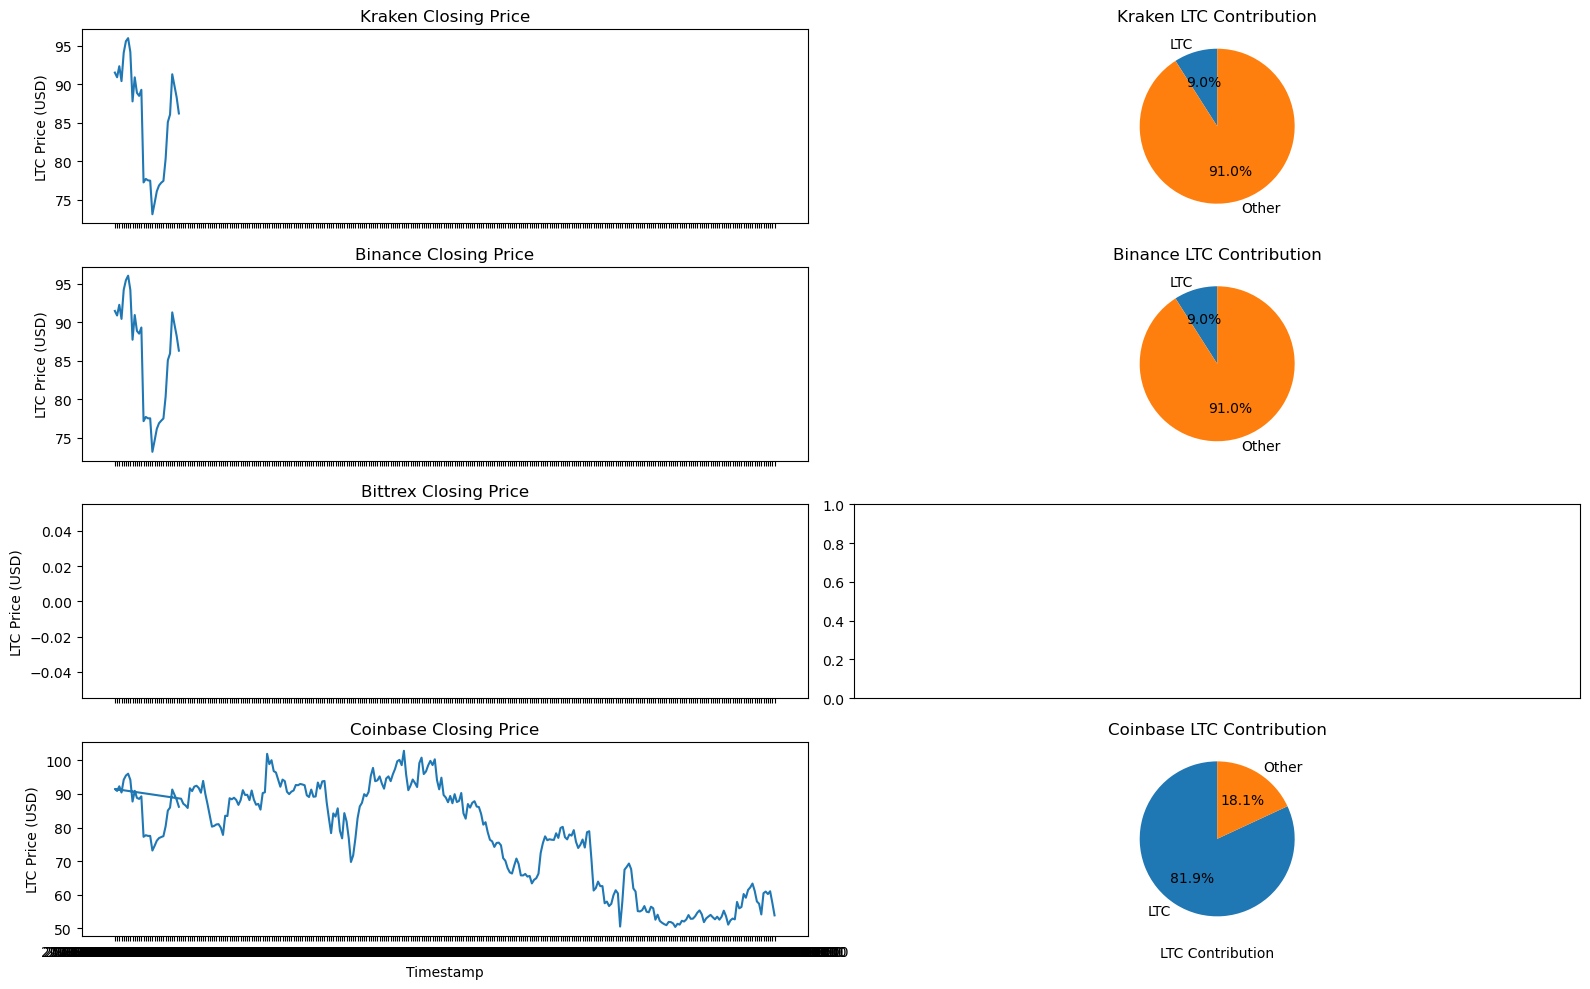

In [98]:
# Filter the data for the desired exchanges and date range
exchanges = ['Kraken', 'Binance', 'Bittrex', 'Coinbase']
start_date = '2022-08-27'  # Adjust the start date as needed
filtered_data = ltc_data[(ltc_data['exchange'].isin(exchanges)) & (ltc_data['timestamp'] >= start_date)]

# Calculate the total closing price for each exchange
total_closing_price = filtered_data.groupby('exchange')['close_price'].sum()

# Create subplots for each exchange
fig, axs = plt.subplots(len(exchanges), 2, figsize=(16, 10), sharex='col')

# Iterate over each exchange
for i, exchange in enumerate(exchanges):
    exchange_data = filtered_data[filtered_data['exchange'] == exchange]
    
    # Plot the closing price
    axs[i, 0].plot(exchange_data['timestamp'], exchange_data['close_price'])
    axs[i, 0].set_ylabel('LTC Price (USD)')
    axs[i, 0].set_title(f'{exchange} Closing Price')
    
    # Check if the exchange exists in the total_closing_price data
    if exchange in total_closing_price.index:
        # Calculate the LTC percentage contribution
        ltc_percentage = total_closing_price[exchange] / total_closing_price.sum()
        other_percentage = 1 - ltc_percentage
    
        # Create a pie chart for the exchange
        axs[i, 1].pie([ltc_percentage, other_percentage], labels=['LTC', 'Other'], autopct='%1.1f%%', startangle=90)
        axs[i, 1].set_title(f'{exchange} LTC Contribution')

# Set common x-axis label
axs[-1, 0].set_xlabel('Timestamp')
axs[-1, 1].set_xlabel('LTC Contribution')

# Adjust spacing between subplots
fig.tight_layout()

# Show the combined plot
plt.show()


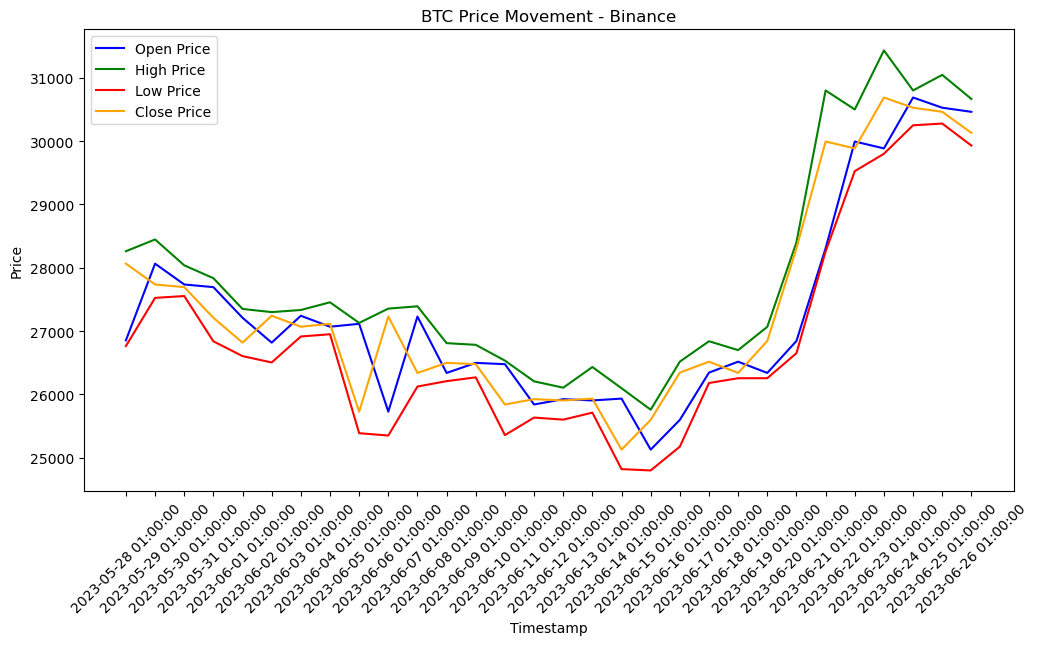

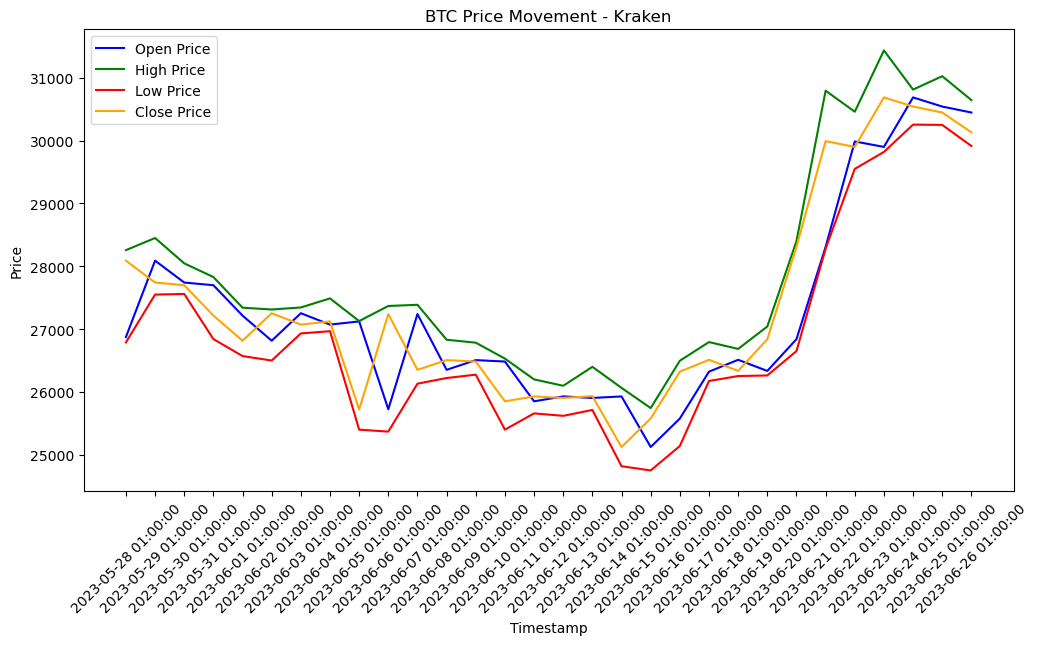

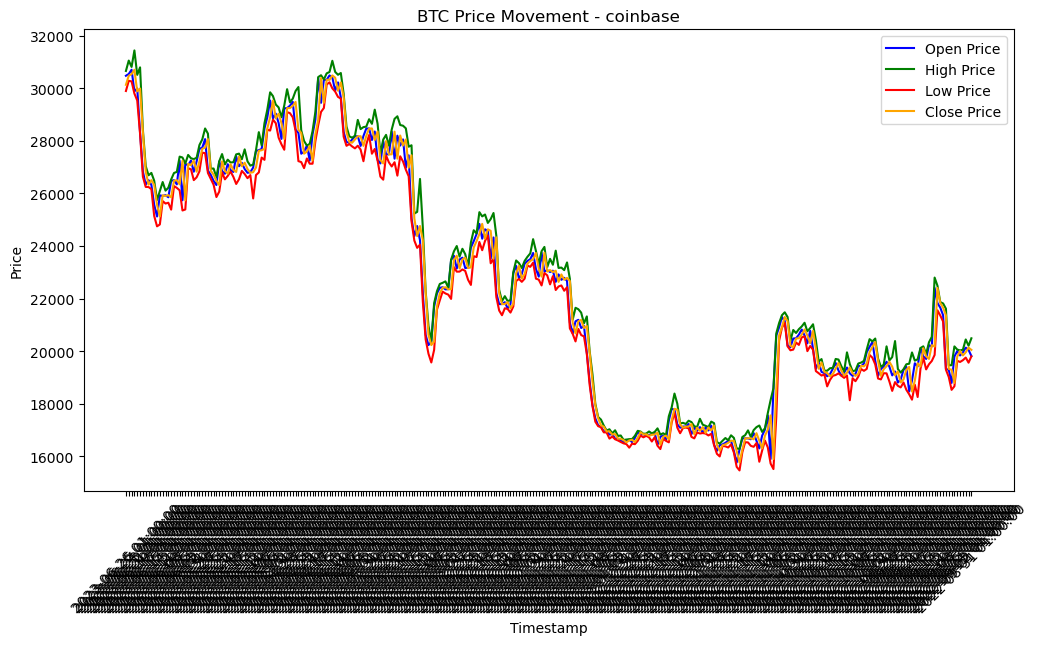

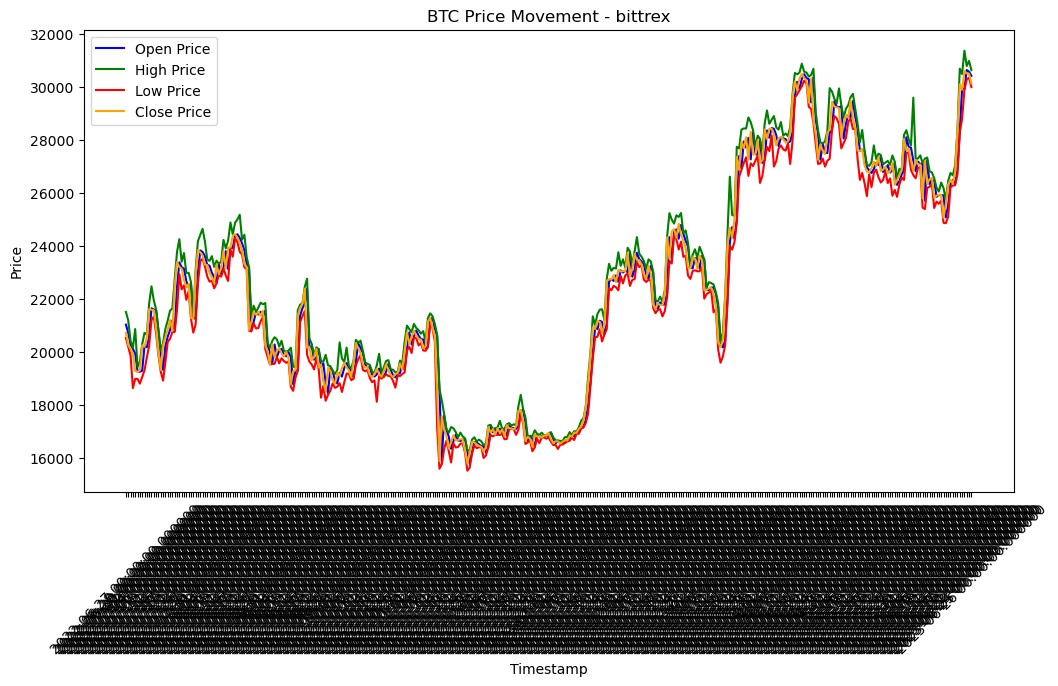

In [88]:

# Filter the btc_data DataFrame for Binance exchange
binance_data = btc_data[btc_data['exchange'] == 'Binance']

# Extract the required columns from the binance_data DataFrame
open_price = binance_data['open_price']
high_price = binance_data['high_price']
low_price = binance_data['low_price']
close_price = binance_data['close_price']
timestamps = binance_data['timestamp']

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(timestamps, open_price, label='Open Price', color='blue')
plt.plot(timestamps, high_price, label='High Price', color='green')
plt.plot(timestamps, low_price, label='Low Price', color='red')
plt.plot(timestamps, close_price, label='Close Price', color='orange')

# Set labels and title
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('BTC Price Movement - Binance')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.show()


# Filter the btc_data DataFrame for Binance exchange
Kraken_data = btc_data[btc_data['exchange'] == 'Kraken']

# Extract the required columns from the binance_data DataFrame
open_price = Kraken_data['open_price']
high_price = Kraken_data['high_price']
low_price = Kraken_data['low_price']
close_price = Kraken_data['close_price']
timestamps = Kraken_data['timestamp']

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(timestamps, open_price, label='Open Price', color='blue')
plt.plot(timestamps, high_price, label='High Price', color='green')
plt.plot(timestamps, low_price, label='Low Price', color='red')
plt.plot(timestamps, close_price, label='Close Price', color='orange')

# Set labels and title
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('BTC Price Movement - Kraken')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.show()


# Filter the btc_data DataFrame for Binance exchange
coinbase_data = btc_data[btc_data['exchange'] == 'Coinbase']

# Extract the required columns from the binance_data DataFrame
open_price = coinbase_data['open_price']
high_price = coinbase_data['high_price']
low_price = coinbase_data['low_price']
close_price = coinbase_data['close_price']
timestamps = coinbase_data['timestamp']

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(timestamps, open_price, label='Open Price', color='blue')
plt.plot(timestamps, high_price, label='High Price', color='green')
plt.plot(timestamps, low_price, label='Low Price', color='red')
plt.plot(timestamps, close_price, label='Close Price', color='orange')

# Set labels and title
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('BTC Price Movement - coinbase')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.show()



# Filter the btc_data DataFrame for Binance exchange
bittrex_data = btc_data[btc_data['exchange'] == 'Bittrex']

# Extract the required columns from the binance_data DataFrame
open_price = bittrex_data['open_price']
high_price = bittrex_data['high_price']
low_price = bittrex_data['low_price']
close_price = bittrex_data['close_price']
timestamps = bittrex_data['timestamp']

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(timestamps, open_price, label='Open Price', color='blue')
plt.plot(timestamps, high_price, label='High Price', color='green')
plt.plot(timestamps, low_price, label='Low Price', color='red')
plt.plot(timestamps, close_price, label='Close Price', color='orange')

# Set labels and title
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('BTC Price Movement - bittrex')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [ ]:
#The above say looks better with more understanding of data gotten from exchanges. while we have more data from coinbase it seems to be incomplete I will fix that in the database code.
# Note most limit in fetched data is directly limited by the api used(paid apis would fetch way more historical data).

In [ ]:
#let's see actual time frame for each exchange data 

In [89]:
#btc
# Group the data by exchange and find the minimum and maximum timestamps
exchange_timeframe = btc_data.groupby('exchange')['timestamp'].agg(['min', 'max'])

# Print the start and stop dates for each exchange
for exchange, timeframe in exchange_timeframe.iterrows():
    start_date = timeframe['min']
    stop_date = timeframe['max']
    print(f"{exchange}: Start Date - {start_date}, Stop Date - {stop_date}")


Binance: Start Date - 2023-05-28 01:00:00, Stop Date - 2023-06-26 01:00:00
Bittrex: Start Date - 2022-06-27 00:00:00.000000, Stop Date - 2023-06-26 00:00:00.000000
Coinbase: Start Date - 2022-08-31 01:00:00, Stop Date - 2023-06-26 01:00:00
Kraken: Start Date - 2023-05-28 01:00:00, Stop Date - 2023-06-26 01:00:00


In [90]:
#ETH
# Group the data by exchange and find the minimum and maximum timestamps
exchange_timeframe = eth_data.groupby('exchange')['timestamp'].agg(['min', 'max'])

# Print the start and stop dates for each exchange
for exchange, timeframe in exchange_timeframe.iterrows():
    start_date = timeframe['min']
    stop_date = timeframe['max']
    print(f"{exchange}: Start Date - {start_date}, Stop Date - {stop_date}")


Binance: Start Date - 2023-05-28 01:00:00, Stop Date - 2023-06-26 01:00:00
Bittrex: Start Date - 2022-06-27 00:00:00.000000, Stop Date - 2023-06-26 00:00:00.000000
Coinbase: Start Date - 2022-08-31 01:00:00, Stop Date - 2023-06-26 01:00:00
Kraken: Start Date - 2023-05-28 01:00:00, Stop Date - 2023-06-26 01:00:00


In [13]:
#let's see open and close price action in each exchange 

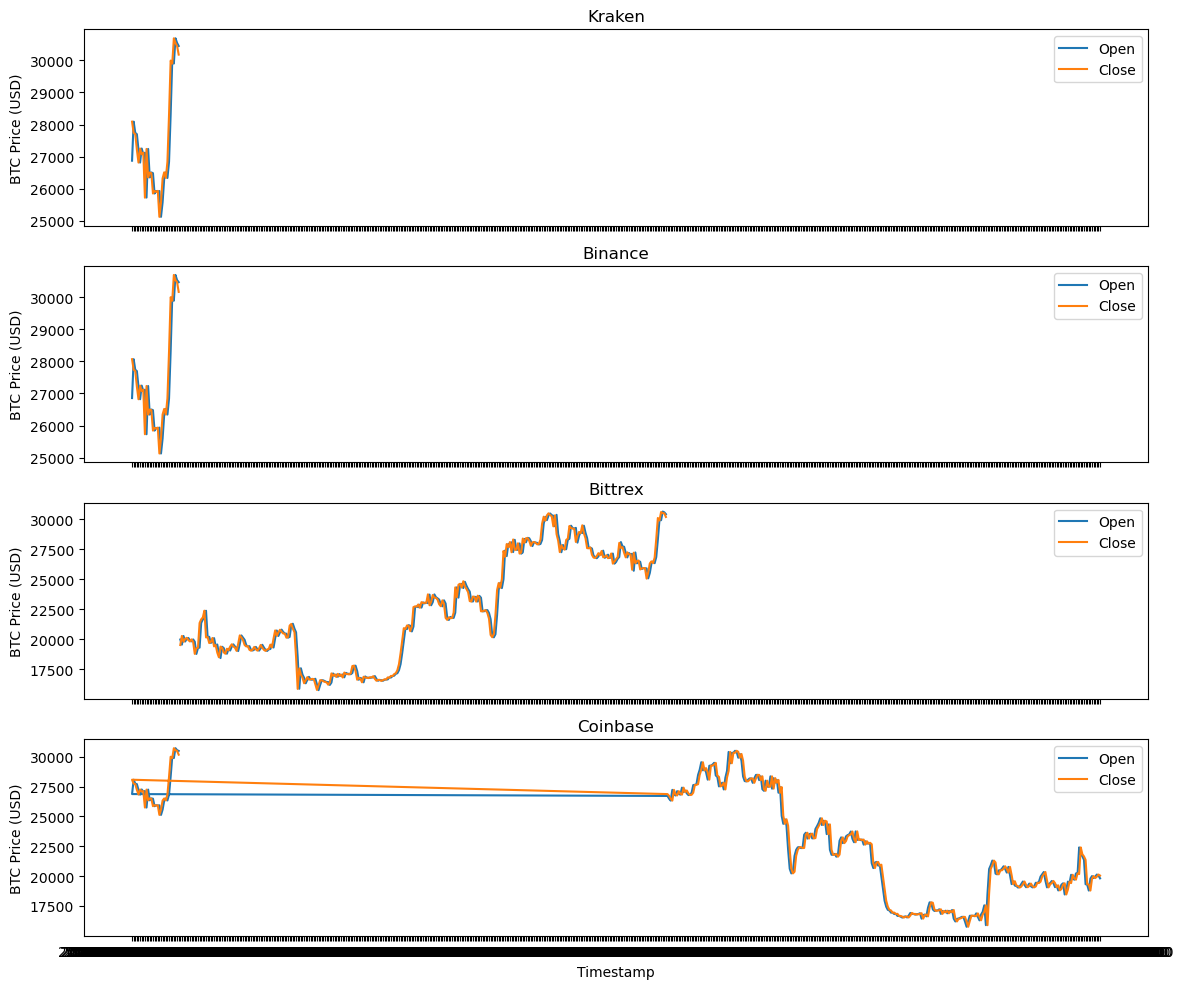

In [43]:
# Define the start and stop dates for Coinbase
coinbase_start_date = '2022-08-27 01:00:00'
coinbase_stop_date = '2023-05-23 01:00:00'

# Filter the data for the desired exchanges and date range
exchanges = ['Kraken', 'Binance', 'Bittrex', 'Coinbase']
filtered_data = btc_data[
    (btc_data['exchange'].isin(exchanges)) &
    (
        (btc_data['exchange'] == 'Coinbase') |
        ((btc_data['exchange'] != 'Coinbase') & (btc_data['timestamp'] >= coinbase_start_date))
    )
]

# Create subplots for each exchange
fig, axs = plt.subplots(len(exchanges), 1, figsize=(12, 10), sharex=True)

# Iterate over each exchange and plot the open and close prices
for i, exchange in enumerate(exchanges):
    exchange_data = filtered_data[filtered_data['exchange'] == exchange]
    axs[i].plot(exchange_data['timestamp'], exchange_data['open_price'], label='Open')
    axs[i].plot(exchange_data['timestamp'], exchange_data['close_price'], label='Close')
    axs[i].set_ylabel('BTC Price (USD)')
    axs[i].set_title(exchange)
    axs[i].legend()  # Add legend to distinguish open and close prices

# Set common x-axis label
axs[-1].set_xlabel('Timestamp')

# Adjust spacing between subplots
fig.tight_layout()

# Show the combined plot
plt.show()


In [ ]:
#let's also preview ETHUSD

In [ ]:
#preview of TVL data from Defilama

In [27]:
# Fetch the top 20 protocols by TVL
top_protocols = session.query(DeFiLlamaTVL).order_by(desc(DeFiLlamaTVL.tvl)).limit(20).all()

# Print the fetched data
for protocol in top_protocols:
    print(f"Protocol: {protocol.protocol}, TVL: {protocol.tvl}")

# Close the session
session.close()

Protocol: Binance CEX, TVL: 59318513999.1781
Protocol: Binance CEX, TVL: 59304842530.42349
Protocol: Lido, TVL: 14037566287.584421
Protocol: Lido, TVL: 14033494583.177282
Protocol: OKX, TVL: 10345180947.076897
Protocol: OKX, TVL: 10339938987.89597
Protocol: Bitfinex, TVL: 9560565482.990574
Protocol: Bitfinex, TVL: 9556177112.497545
Protocol: MakerDAO, TVL: 6277079821.368895
Protocol: MakerDAO, TVL: 6275315042.106567
Protocol: Polygon Bridge & Staking, TVL: 5619660219.735883
Protocol: Polygon Bridge & Staking, TVL: 5605853021.235294
Protocol: WBTC, TVL: 4739107520.019043
Protocol: WBTC, TVL: 4738635119.926148
Protocol: JustLend, TVL: 3830344715.837382
Protocol: JustLend, TVL: 3829177344.3675985
Protocol: Curve DEX, TVL: 3808599430.5611534
Protocol: Curve DEX, TVL: 3808599430.5611534
Protocol: AAVE V2, TVL: 3724980599.0427785
Protocol: AAVE V2, TVL: 3723861501.805204


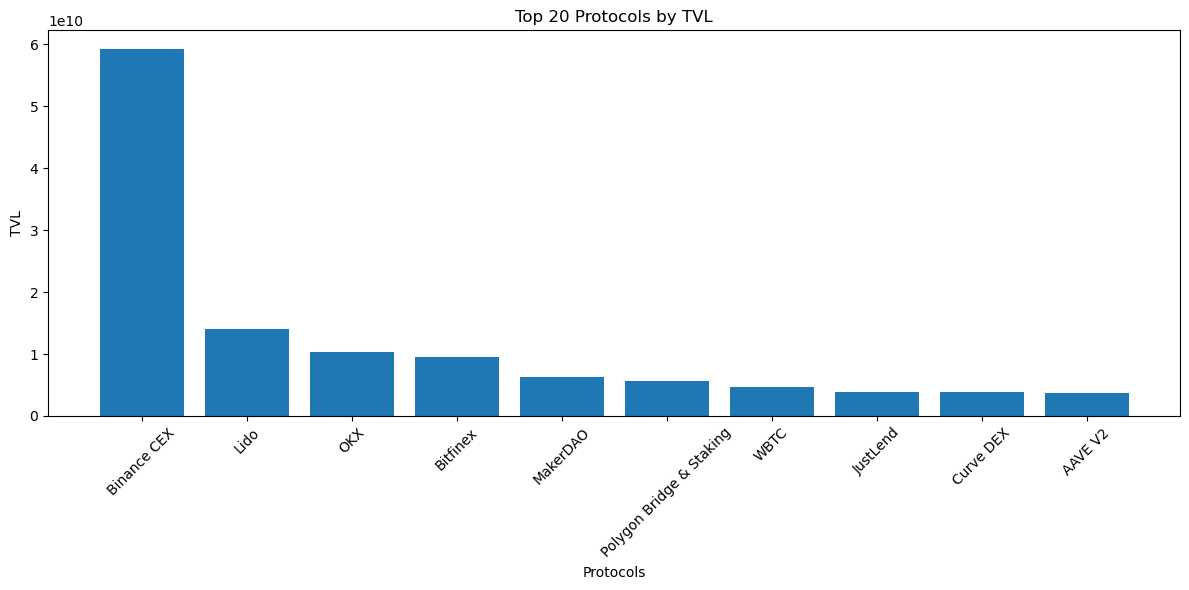

In [28]:
# Extract the protocol names and TVL values
protocols = [protocol.protocol for protocol in top_protocols]
tvls = [protocol.tvl for protocol in top_protocols]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(protocols, tvls)

# Customize the plot
plt.xlabel('Protocols')
plt.ylabel('TVL')
plt.title('Top 10 Protocols by TVL')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()